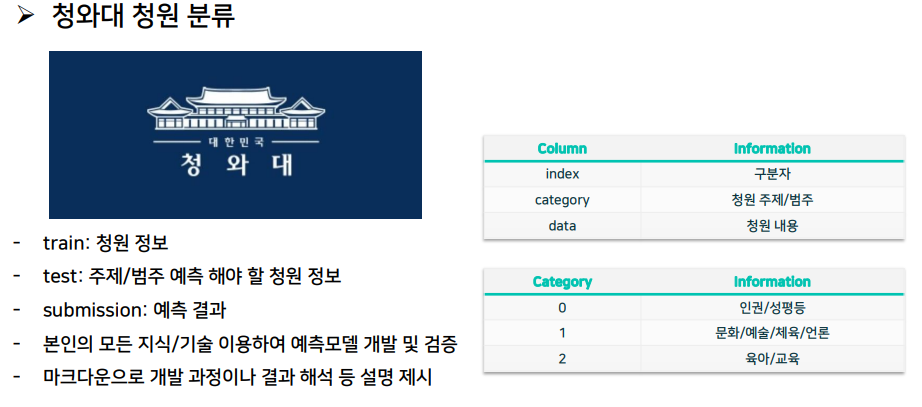


**패키지 불러오기**

In [1]:
import pandas as pd
import numpy as np
np.random.seed(456)
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

****
# EDA

**how = 'any'/'all'**

- any -> row 또는 column에 NaN값이 1개만 있어도 drop (default 값입니다.)

- all -> row 또는 column에 있는 모든 값이 NaN이어야 drop

In [2]:
train_data = pd.read_csv("train_cw.csv").iloc[:, 1:].dropna(how = 'any')
train_data.index = range(len(train_data))
test_data = pd.read_csv("test_cw.csv").iloc[:, 1:]
submission = pd.read_csv("submission_cw.csv")

In [3]:
train_data.shape, test_data.shape

((39992, 2), (5000, 1))

In [4]:
train_data.head()

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [5]:
test_data.head()

,data
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


# 데이터 전처리

## Cleansing Text

텍스트를 정제하기위해 함수 생성

In [6]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        #구두점제거
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) 
        # 숫자 제거
        review = re.sub(r'\d+','', str(texts[i]))
        review = review.lower() 
        # 여분의 공백 제거
        review = re.sub(r'\s+', ' ', review) 
        # Html태그 제거
        review = re.sub(r'<[^>]+>','',review) 
        # 공백들 제거
        review = re.sub(r'\s+', ' ', review) 
        # 첫 공백 제거
        review = re.sub(r"^\s+", '', review) 
        # 마지막 공백 제거
        review = re.sub(r'\s+$', '', review)
        corpus.append(review)
    return corpus

In [7]:
train_data.data = clean_text(train_data.data)
test_data.data = clean_text(test_data.data)

****

## 문자열 구두점 정리

개행 문자 제거

In [8]:
train_data_text = list(train_data['data'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train_data['clear_text'] = train_clear_text
train_data.head()

100%|████████████████████████████████████████████████████████████████████████| 39992/39992 [00:00<00:00, 588121.09it/s]


,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [9]:
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
    # 특수문자 제거
    temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
    train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올...
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일...
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


테스트 데이터셋도 마찬가지로 적용

In [10]:
test_data_text = list(test_data['data'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 625008.05it/s]


,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에 *지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...","방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [11]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...",방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


****

## Okt는 토크나이저 모듈로 문장을 토큰화

In [12]:
from konlpy.tag import Okt
okt = Okt()

불용어 설정, 의미없고 자주 나오는 말

In [13]:
stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을']

****

## Okt를 이용하여 명사 얻기

In [14]:
X_train = []

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = okt.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|████████████████████████████████████████████████████████████████████████████| 39992/39992 [10:38<00:00, 62.66it/s]


In [15]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = okt.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:22<00:00, 60.60it/s]



# Modeling

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [18]:
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 48377
등장 빈도가 10번 이하인 희귀 단어의 수: 34570
단어 집합에서 희귀 단어의 비율: 71.45957789858817
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9223929427034525


In [19]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 13808


In [20]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)

In [21]:
y_train = to_categorical(np.array(train_data['category']))

In [22]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]

In [23]:
# 빈 샘플들을 제거
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

39971
39971


C:\Users\ebdl\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


train data의 최대 길이 : 5556
train data의 평균 길이 : 76.19544169522904


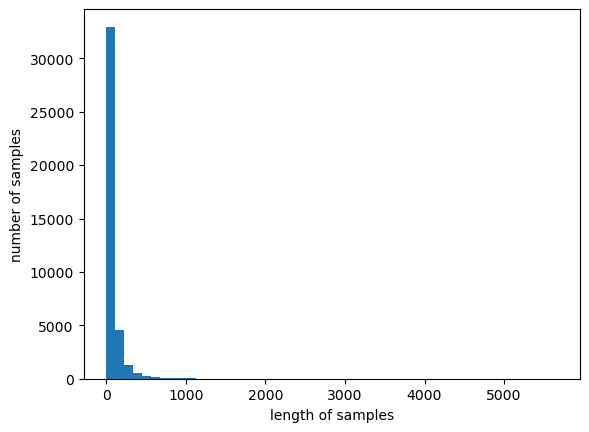

In [24]:
print('train data의 최대 길이 :',max(len(l) for l in del_X_train))
print('train data의 평균 길이 :',sum(map(len, del_X_train))/len(del_X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

test data의 최대 길이 :  4055
test data의 평균 길이 :  75.851


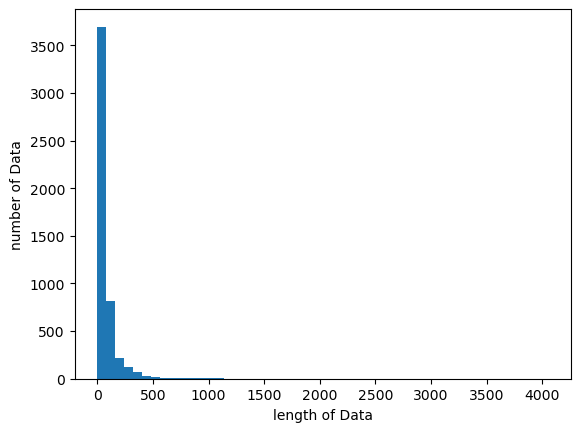

In [25]:
print("test data의 최대 길이 : ", max(len(l) for l in token_X_test))
print("test data의 평균 길이 : ", sum(map(len, token_X_test))/ len(token_X_test))
plt.hist([len(s) for s in token_X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [26]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [27]:
max_len = 300
below_threshold_len(max_len, del_X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 96.41239898926722


In [28]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)

## Model 1
워드 임베딩이란 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말합니다.

In [29]:
model1 = Sequential()
model1.add(Embedding(vocab_size,64, input_length=max_len))
model1.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(3, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           883712    
                                                                 
 conv1d (Conv1D)             (None, 300, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 904,451
Trainable params: 904,451
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy', metrics=['acc'])
reLR = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 2)
mc = ModelCheckpoint(filepath = '1128_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)

C:\Users\ebdl\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64, shuffle = True, validation_split=0.2, verbose = 1, callbacks=[es, mc, reLR])

Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.8157 - acc: 0.7724
Epoch 1: val_acc improved from -inf to 0.84828, saving model to 1128_1.h5
500/500 [==============================] - 11s 8ms/step - loss: 0.8157 - acc: 0.7724 - val_loss: 0.5035 - val_acc: 0.8483 - lr: 5.0000e-04
Epoch 2/30
497/500 [============================>.] - ETA: 0s - loss: 0.4522 - acc: 0.8552
Epoch 2: val_acc improved from 0.84828 to 0.86204, saving model to 1128_1.h5
500/500 [==============================] - 3s 5ms/step - loss: 0.4520 - acc: 0.8552 - val_loss: 0.4164 - val_acc: 0.8620 - lr: 5.0000e-04
Epoch 3/30
498/500 [============================>.] - ETA: 0s - loss: 0.3891 - acc: 0.8682
Epoch 3: val_acc improved from 0.86204 to 0.86817, saving model to 1128_1.h5
500/500 [==============================] - 3s 6ms/step - loss: 0.3889 - acc: 0.8683 - val_loss: 0.3808 - val_acc: 0.8682 - lr: 5.0000e-04
Epoch 4/30
498/500 [============================>.] - ETA: 0s - loss: 0.3575 - acc: 

In [32]:
model1 = load_model('1128_1.h5') # val_acc = 0.87893

In [33]:
pred1 = model1.predict(pad_X_test)

157/157 [==============================] - 0s 1ms/step


## Model 2

In [34]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length = max_len))
model2.add(Conv1D(64, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(3, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           883712    
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 55, 64)            20544     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                     

In [35]:
model2.compile(optimizer = RMSprop(lr = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])

callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath = '1128_2.h5', monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 64, verbose = 1, validation_split = .2, callbacks=callback_ear)

Epoch 1/15
500/500 [==============================] - ETA: 0s - loss: 0.7216 - acc: 0.7378
Epoch 1: val_acc improved from -inf to 0.86829, saving model to 1128_2.h5
500/500 [==============================] - 5s 9ms/step - loss: 0.7216 - acc: 0.7378 - val_loss: 0.5402 - val_acc: 0.8683
Epoch 2/15
499/500 [============================>.] - ETA: 0s - loss: 0.4358 - acc: 0.8736
Epoch 2: val_acc improved from 0.86829 to 0.87492, saving model to 1128_2.h5
500/500 [==============================] - 4s 8ms/step - loss: 0.4357 - acc: 0.8737 - val_loss: 0.4179 - val_acc: 0.8749
Epoch 3/15
500/500 [==============================] - ETA: 0s - loss: 0.3687 - acc: 0.8911
Epoch 3: val_acc improved from 0.87492 to 0.87892, saving model to 1128_2.h5
500/500 [==============================] - 4s 8ms/step - loss: 0.3687 - acc: 0.8911 - val_loss: 0.3931 - val_acc: 0.8789
Epoch 4/15
493/500 [============================>.] - ETA: 0s - loss: 0.3253 - acc: 0.9049
Epoch 4: val_acc did not improve from 0.87892

In [36]:
model2 = load_model('1128_2.h5') # val_acc = 0.8841

In [37]:
pred2 = model2.predict(pad_X_test)

157/157 [==============================] - 0s 1ms/step


## Model 3

In [38]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(16))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           883712    
                                                                 
 conv1d_3 (Conv1D)           (None, 296, 32)           10272     
                                                                 
 conv1d_4 (Conv1D)           (None, 292, 32)           5152      
                                                                 
 conv1d_5 (Conv1D)           (None, 288, 32)           5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 72, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                      

In [39]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])

In [40]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1128_3.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=32, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
1000/1000 [==============================] - ETA: 0s - loss: 0.5735 - acc: 0.7602
Epoch 1: val_acc improved from -inf to 0.86316, saving model to 1128_3.h5
1000/1000 [==============================] - 15s 10ms/step - loss: 0.5735 - acc: 0.7602 - val_loss: 0.3738 - val_acc: 0.8632
Epoch 2/30
 999/1000 [============================>.] - ETA: 0s - loss: 0.3702 - acc: 0.8709
Epoch 2: val_acc improved from 0.86316 to 0.87855, saving model to 1128_3.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3703 - acc: 0.8709 - val_loss: 0.3369 - val_acc: 0.8785
Epoch 3/30
 999/1000 [============================>.] - ETA: 0s - loss: 0.3301 - acc: 0.8864
Epoch 3: val_acc improved from 0.87855 to 0.88055, saving model to 1128_3.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3300 - acc: 0.8864 - val_loss: 0.3310 - val_acc: 0.8806
Epoch 4/30
 998/1000 [============================>.] - ETA: 0s - loss: 0.3086 - acc: 0.8932
Epoch 4: val_acc did not impr

In [41]:
model3 = load_model('1128_3.h5')

In [42]:
pred3 = model3.predict(pad_X_test)

157/157 [==============================] - 1s 3ms/step


## Model 4

In [43]:
model4 = Sequential()
model4.add(Embedding(vocab_size, 32, input_length=max_len))
model4.add(Dropout(0.3))
model4.add(Conv1D(32, 5, activation='relu'))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(32))
model4.add(Dense(3, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 32)           441856    
                                                                 
 dropout_2 (Dropout)         (None, 300, 32)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 296, 32)           5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 74, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                      

In [44]:
model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])

In [45]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1128_4.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history4 = model4.fit(pad_X_train, del_y_train, epochs=30, batch_size=64, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
498/500 [============================>.] - ETA: 0s - loss: 0.6301 - acc: 0.7252
Epoch 1: val_acc improved from -inf to 0.86216, saving model to 1128_4.h5
500/500 [==============================] - 6s 10ms/step - loss: 0.6291 - acc: 0.7258 - val_loss: 0.3837 - val_acc: 0.8622
Epoch 2/30
496/500 [============================>.] - ETA: 0s - loss: 0.3396 - acc: 0.8730
Epoch 2: val_acc improved from 0.86216 to 0.87730, saving model to 1128_4.h5
500/500 [==============================] - 4s 9ms/step - loss: 0.3397 - acc: 0.8729 - val_loss: 0.3260 - val_acc: 0.8773
Epoch 3/30
495/500 [============================>.] - ETA: 0s - loss: 0.2971 - acc: 0.8877
Epoch 3: val_acc did not improve from 0.87730
500/500 [==============================] - 4s 8ms/step - loss: 0.2968 - acc: 0.8879 - val_loss: 0.3244 - val_acc: 0.8759
Epoch 4/30
495/500 [============================>.] - ETA: 0s - loss: 0.2764 - acc: 0.8939
Epoch 4: val_acc improved from 0.87730 to 0.88030, saving model to 1128_4.h

In [46]:
model4 = load_model('1128_4.h5')

In [47]:
pred4 = model4.predict(pad_X_test)

157/157 [==============================] - 1s 2ms/step


## Model Ensemble

In [48]:
mean_pred = .1 * pred1 + .3 * pred2 + .2 * pred3 + .4 * pred4

In [49]:
submission.category = np.argmax(mean_pred, axis = -1)

In [50]:
submission.to_csv("18011744_전민규_submission.csv", index = False)